In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
from category_encoders import OneHotEncoder,OrdinalEncoder, TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import shap
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from catboost import Pool,CatBoostClassifier

In [3]:
DATA_PATH = ''
df_final = pd.read_csv(f'{DATA_PATH}df_final.csv')
df_final.head()         

날짜  시간  업종     시도   구  월           time    기온  체감온도  일강수량  ...  \
0  2019-05-19  14  치킨  서울특별시  중구  5  2019.05.19.14  21.0  24.1  12.8  ...   
1  2019-05-27  23  치킨  서울특별시  중구  5  2019.05.27.23  15.3  16.5   7.1  ...   
2  2019-05-30  12  치킨  서울특별시  중구  5  2019.05.30.12  23.9  22.8   0.0  ...   
3  2019-06-01  22  치킨  서울특별시  중구  6  2019.06.01.22  17.5  18.9   0.0  ...   
4  2019-06-05  19  치킨  서울특별시  중구  6  2019.06.05.19  24.9  25.6   0.0  ...   

     30대    40대    50대    60대   70대   80대  90대이상    미세   초미세  주문정도  
0  21749  18632  20811  16464  9514  3846    541  11.0   8.0     1  
1  21749  18632  20811  16464  9514  3846    541  11.0   5.0     1  
2  21749  18632  20811  16464  9514  3846    541  38.0  20.0     1  
3  21749  18632  20811  16464  9514  3846    541  19.0  14.0     1  
4  21749  18632  20811  16464  9514  3846    541  50.0  36.0     1  

[5 rows x 30 columns]

In [4]:
df_final.drop(columns = ['날짜', 'time', '시도'],inplace = True)
df_final.head()

시간  업종   구  월    기온  체감온도  일강수량  상대습도   적설   풍속  ...    30대    40대    50대  \
0  14  치킨  중구  5  21.0  24.1  12.8  91.0  0.0  1.5  ...  21749  18632  20811   
1  23  치킨  중구  5  15.3  16.5   7.1  62.0  0.0  3.5  ...  21749  18632  20811   
2  12  치킨  중구  5  23.9  22.8   0.0  35.0  0.0  3.8  ...  21749  18632  20811   
3  22  치킨  중구  6  17.5  18.9   0.0  65.0  0.0  1.1  ...  21749  18632  20811   
4  19  치킨  중구  6  24.9  25.6   0.0  57.0  0.0  1.9  ...  21749  18632  20811   

     60대   70대   80대  90대이상    미세   초미세  주문정도  
0  16464  9514  3846    541  11.0   8.0     1  
1  16464  9514  3846    541  11.0   5.0     1  
2  16464  9514  3846    541  38.0  20.0     1  
3  16464  9514  3846    541  19.0  14.0     1  
4  16464  9514  3846    541  50.0  36.0     1  

[5 rows x 27 columns]

In [5]:
X_train, X_test = train_test_split(df_final, test_size = 0.2, random_state = 42)
X_train, X_val = train_test_split(X_train, test_size = 0.2, random_state = 42)
y_train, y_val, y_test = X_train.pop('주문정도'), X_val.pop('주문정도'), X_test.pop('주문정도')
display(X_train.head())
display(X_val.head())
display(y_train.head())

시간      업종    구   월    기온  체감온도  일강수량  상대습도    적설   풍속  ...     20대  \
220381  14  카페/디저트  구로구   4  17.5  15.8   0.0   0.0  23.0  2.4  ...   55435   
191931  21  돈까스/일식  관악구  11   9.6   9.6   0.0   0.0  65.0  1.2  ...  113842   
218370  23  카페/디저트  구로구   4  11.8  12.0   0.0   0.0  42.0  1.3  ...   55435   
195845   4   패스트푸드  관악구  12   1.6  -1.5   0.0   0.0  59.0  2.9  ...  113842   
361189  22      분식  도봉구   8  25.4  28.4  97.0  88.0   0.0  0.8  ...   43631   

          30대    40대    50대    60대    70대    80대  90대이상    미세        초미세  
220381  67782  66894  71362  61764  32081  11138   1316  31.0  22.850503  
191931  91281  69274  70623  60404  36260  11928   1399  39.0  26.000000  
218370  67782  66894  71362  61764  32081  11138   1316  53.0  22.000000  
195845  91281  69274  70623  60404  36260  11928   1399  30.0  19.000000  
361189  41171  48240  56364  47731  27177  11147   1542  14.0   8.000000  

[5 rows x 26 columns]

시간      업종    구   월    기온  체감온도  일강수량  상대습도    적설   풍속  ...     20대  \
309006  23      분식  금천구  10  14.0  13.8   0.0   0.0  75.0  2.0  ...   36573   
76682    0      분식  구로구  11   3.0  -0.1   7.5   0.0  51.0  3.2  ...   55916   
623548  18  배달전문업체  동작구   3   6.5   3.7   0.0   0.0  57.0  3.9  ...   72505   
651823  17  아시안/양식  관악구   2   8.6   6.4   0.0   0.0  59.0  3.7  ...  113253   
493466  22      분식  강북구   3   5.3   2.5   0.0   0.0  72.0  3.5  ...   42810   

          30대    40대    50대    60대    70대    80대  90대이상    미세   초미세  
309006  39196  36478  45649  36456  18108   6170    746  26.0  17.0  
76682   70334  68362  72672  59195  30190  10270   1202  12.0  11.0  
623548  64378  57849  60030  52065  29500  12016   1531  23.0  12.0  
651823  90908  67481  70006  62736  36618  13030   1497  40.0  25.0  
493466  38989  45696  51306  43935  29004  10496   1245  90.0  53.0  

[5 rows x 26 columns]

220381    3
191931    1
218370    1
195845    1
361189    1
Name: 주문정도, dtype: int64

In [6]:
X_train.shape, X_val.shape, X_test.shape

((461719, 26), (115430, 26), (144288, 26))

In [7]:
#랜덤포레스트
pipe_rf = make_pipeline(TargetEncoder(min_samples_leaf = 2, smoothing = 1000),
                       RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))  

pipe_rf.fit(X_train, y_train)

print(pipe_rf.score(X_train, y_train))
print(pipe_rf.score(X_val, y_val))

y_prob = pipe_rf.predict_proba(X_train) 
print('학습 AUC',roc_auc_score(y_train, y_prob, multi_class="ovr", average="weighted"))

y_prob = pipe_rf.predict_proba(X_val)
print(roc_auc_score(y_val, y_prob, multi_class="ovr", average="weighted")) #변수를 추가하니까 0.826에서 0.833으로 증가

0.9999870050831783
0.6876115394611453
학습 AUC 0.9999999994093625
0.8359469847372205


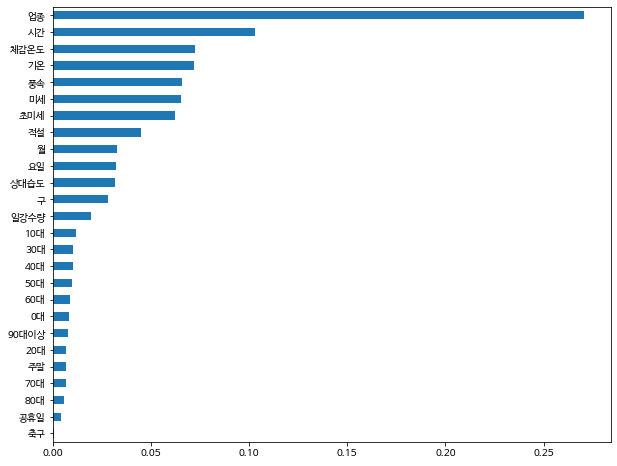

In [25]:
fig = plt.figure(figsize = (10,8))
pd.Series(pipe_rf.named_steps['randomforestclassifier'].feature_importances_, index = X_val.columns).sort_values().plot.barh()

In [26]:
#xgboost
pipe_xgb = make_pipeline(TargetEncoder(min_samples_leaf = 2, smoothing = 1000),
                       XGBClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))  

pipe_xgb.fit(X_train, y_train)

print(pipe_xgb.score(X_train, y_train))
print(pipe_xgb.score(X_val, y_val)) #정확도도 증가

y_prob = pipe_xgb.predict_proba(X_train) 
print('학습 AUC',roc_auc_score(y_train, y_prob, multi_class="ovr", average="weighted"))

y_prob = pipe_xgb.predict_proba(X_val) 
print('검증 AUC', roc_auc_score(y_val, y_prob, multi_class="ovr", average="weighted")) #AUC가 0.8279에서 훨씬 증가

[14:42:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7238666808166873
0.7180282422247249
학습 AUC 0.8715909640648501
검증 AUC 0.8602456821864018


In [8]:
#LGBM
pipe_lgbm = make_pipeline(TargetEncoder(min_samples_leaf = 2, smoothing = 1000),
                       LGBMClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))  

pipe_lgbm.fit(X_train, y_train)

print(pipe_lgbm.score(X_train, y_train))
print(pipe_lgbm.score(X_val, y_val)) #정확도도 증가

y_prob = pipe_lgbm.predict_proba(X_train) 
print('학습 AUC',roc_auc_score(y_train, y_prob, multi_class="ovr", average="weighted"))

y_prob = pipe_lgbm.predict_proba(X_val) 
print(roc_auc_score(y_val, y_prob, multi_class="ovr", average="weighted")) #AUC가 0.8279에서 훨씬 증가

0.7067458779040932
0.7056830979814607
학습 AUC 0.8495883340247767
0.8451279335915096


### 성능이 좋은 XGBoost와 LGBM으로 파라미터 튜닝을 해보자.

In [5]:
#파이프를 넣으면 정확도와 AUC를 계산하는 함수
#파이프를 넣으면 정확도와 AUC를 계산하는 함수
def accuracy_and_auc(pipe):
    print('학습 정확도', pipe.score(X_train, y_train))
    print('검증 정확도', pipe.score(X_val, y_val))
    y_prob = pipe.predict_proba(X_train)
    train_roc = roc_auc_score(y_train, y_prob, multi_class="ovr", average="weighted")
    print('학습 AUC',train_roc)

    y_prob = pipe.predict_proba(X_val)
    val_roc = roc_auc_score(y_val, y_prob, multi_class="ovr", average="weighted")
    print('검증 AUC', val_roc)
    print('학습과 검증 AUC 차이', train_roc - val_roc )
    
    
def accuracy_and_auc2(xgb):
    print('학습 정확도', xgb.score(X_train_encoded, y_train))
    print('검증 정확도', xgb.score(X_val_encoded, y_val))
    y_prob = xgb.predict_proba(X_train_encoded)
    train_roc = roc_auc_score(y_train, y_prob, multi_class="ovr", average="weighted")
    print('학습 AUC',roc_auc_score(y_train, y_prob, multi_class="ovr", average="weighted"))

    y_prob = xgb.predict_proba(X_val_encoded)
    val_roc = roc_auc_score(y_val, y_prob, multi_class="ovr", average="weighted")

    print('검증 AUC', roc_auc_score(y_val, y_prob, multi_class="ovr", average="weighted"))
    print('학습과 검증 AUC 차이', train_roc - val_roc )

    

In [29]:
%%time
encoder = TargetEncoder(min_samples_leaf = 2, smoothing = 1000)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)
xgb =  XGBClassifier(n_estimators = 1000, random_state = 42, n_jobs = -1, tree_method = 'gpu_hist', predictor = 'gpu_predictor')

dists = {
    'xgbclassifier__max_depth': np.arange(5,9,1),
    'xgbclassifier__learning_rate' : np.arange(0.025, 0.05, 0.005),
    'xgbclassifier__max_features': uniform(0,1)
}

clf_xgb = RandomizedSearchCV(
    xgb,
    param_distributions = dists,
    n_iter = 100,
    cv = 5,
    scoring = 'roc_auc_ovr_weighted',
    verbose = 1,
    n_jobs = -1
)
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]
clf_xgb.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'auc', early_stopping_rounds = 10)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 79.6min finished


[16:07:29] WARNING: ../src/learner.cc:576: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.75617	validation_1-auc:0.75529
[1]	validation_0-auc:0.76795	validation_1-auc:0.76664
[2]	validation_0-auc:0.77308	validation_1-auc:0.77180
[3]	validation_0-auc:0.77771	validation_1-auc:0.77633
[4]	validation_0-auc:0.78119	validation_1-auc:0.77976
[5]	validation_0-auc:0.78470	validation_1-auc:0.78321
[6]	validation_0-auc:0.78886	validation_1-auc:0.78716
[7]	validation_0-auc:0.79199	validation_1-auc:0.79009
[8]	validation_0-auc:0.79514	validation_1-auc:0.79306
[9]	validation_0-auc:0.79877	validation_1-auc:0.79664
[10]	validation_0-auc:

[141]	validation_0-auc:0.87965	validation_1-auc:0.86439
[142]	validation_0-auc:0.87986	validation_1-auc:0.86453
[143]	validation_0-auc:0.88000	validation_1-auc:0.86458
[144]	validation_0-auc:0.88016	validation_1-auc:0.86463
[145]	validation_0-auc:0.88034	validation_1-auc:0.86470
[146]	validation_0-auc:0.88054	validation_1-auc:0.86479
[147]	validation_0-auc:0.88067	validation_1-auc:0.86485
[148]	validation_0-auc:0.88088	validation_1-auc:0.86498
[149]	validation_0-auc:0.88099	validation_1-auc:0.86506
[150]	validation_0-auc:0.88115	validation_1-auc:0.86505
[151]	validation_0-auc:0.88121	validation_1-auc:0.86505
[152]	validation_0-auc:0.88149	validation_1-auc:0.86530
[153]	validation_0-auc:0.88168	validation_1-auc:0.86538
[154]	validation_0-auc:0.88186	validation_1-auc:0.86550
[155]	validation_0-auc:0.88199	validation_1-auc:0.86552
[156]	validation_0-auc:0.88223	validation_1-auc:0.86566
[157]	validation_0-auc:0.88243	validation_1-auc:0.86575
[158]	validation_0-auc:0.88282	validation_1-auc:

[288]	validation_0-auc:0.89745	validation_1-auc:0.87093
[289]	validation_0-auc:0.89751	validation_1-auc:0.87093
[290]	validation_0-auc:0.89760	validation_1-auc:0.87092
[291]	validation_0-auc:0.89768	validation_1-auc:0.87097
[292]	validation_0-auc:0.89776	validation_1-auc:0.87098
[293]	validation_0-auc:0.89782	validation_1-auc:0.87097
[294]	validation_0-auc:0.89791	validation_1-auc:0.87096
[295]	validation_0-auc:0.89794	validation_1-auc:0.87096
[296]	validation_0-auc:0.89807	validation_1-auc:0.87098
[297]	validation_0-auc:0.89817	validation_1-auc:0.87099
[298]	validation_0-auc:0.89824	validation_1-auc:0.87100
[299]	validation_0-auc:0.89833	validation_1-auc:0.87101
[300]	validation_0-auc:0.89841	validation_1-auc:0.87101
[301]	validation_0-auc:0.89848	validation_1-auc:0.87100
[302]	validation_0-auc:0.89856	validation_1-auc:0.87103
[303]	validation_0-auc:0.89870	validation_1-auc:0.87116
[304]	validation_0-auc:0.89878	validation_1-auc:0.87117
[305]	validation_0-auc:0.89890	validation_1-auc:

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           tree_method='gpu_hist',
                                           validate_parameters=None,
                                           ve

In [30]:
print("Best Parameter: {}".format(clf_xgb.best_params_))

Best Parameter: {'xgbclassifier__learning_rate': 0.030000000000000002, 'xgbclassifier__max_depth': 5, 'xgbclassifier__max_features': 0.7697637584605892}


In [36]:
xgb_best = clf_xgb.best_estimator_
xgb_best.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'auc', early_stopping_rounds = 10)

[16:11:16] WARNING: ../src/learner.cc:576: 
Parameters: { "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.75617	validation_1-auc:0.75529
[1]	validation_0-auc:0.76795	validation_1-auc:0.76664
[2]	validation_0-auc:0.77308	validation_1-auc:0.77180
[3]	validation_0-auc:0.77771	validation_1-auc:0.77633
[4]	validation_0-auc:0.78119	validation_1-auc:0.77976
[5]	validation_0-auc:0.78470	validation_1-auc:0.78321
[6]	validation_0-auc:0.78886	validation_1-auc:0.78716
[7]	validation_0-auc:0.79199	validation_1-auc:0.79009
[8]	validation_0-auc:0.79514	validation_1-auc:0.79306
[9]	validation_0-auc:0.79877	validation_1-auc:0.79664
[10]	validation_0-auc:

[141]	validation_0-auc:0.87965	validation_1-auc:0.86439
[142]	validation_0-auc:0.87986	validation_1-auc:0.86453
[143]	validation_0-auc:0.88000	validation_1-auc:0.86458
[144]	validation_0-auc:0.88016	validation_1-auc:0.86463
[145]	validation_0-auc:0.88034	validation_1-auc:0.86470
[146]	validation_0-auc:0.88054	validation_1-auc:0.86479
[147]	validation_0-auc:0.88067	validation_1-auc:0.86485
[148]	validation_0-auc:0.88088	validation_1-auc:0.86498
[149]	validation_0-auc:0.88099	validation_1-auc:0.86506
[150]	validation_0-auc:0.88115	validation_1-auc:0.86505
[151]	validation_0-auc:0.88121	validation_1-auc:0.86505
[152]	validation_0-auc:0.88149	validation_1-auc:0.86530
[153]	validation_0-auc:0.88168	validation_1-auc:0.86538
[154]	validation_0-auc:0.88186	validation_1-auc:0.86550
[155]	validation_0-auc:0.88199	validation_1-auc:0.86552
[156]	validation_0-auc:0.88223	validation_1-auc:0.86566
[157]	validation_0-auc:0.88243	validation_1-auc:0.86575
[158]	validation_0-auc:0.88282	validation_1-auc:

[288]	validation_0-auc:0.89745	validation_1-auc:0.87093
[289]	validation_0-auc:0.89751	validation_1-auc:0.87093
[290]	validation_0-auc:0.89760	validation_1-auc:0.87092
[291]	validation_0-auc:0.89768	validation_1-auc:0.87097
[292]	validation_0-auc:0.89776	validation_1-auc:0.87098
[293]	validation_0-auc:0.89782	validation_1-auc:0.87097
[294]	validation_0-auc:0.89791	validation_1-auc:0.87096
[295]	validation_0-auc:0.89794	validation_1-auc:0.87096
[296]	validation_0-auc:0.89807	validation_1-auc:0.87098
[297]	validation_0-auc:0.89817	validation_1-auc:0.87099
[298]	validation_0-auc:0.89824	validation_1-auc:0.87100
[299]	validation_0-auc:0.89833	validation_1-auc:0.87101
[300]	validation_0-auc:0.89841	validation_1-auc:0.87101
[301]	validation_0-auc:0.89848	validation_1-auc:0.87100
[302]	validation_0-auc:0.89856	validation_1-auc:0.87103
[303]	validation_0-auc:0.89870	validation_1-auc:0.87116
[304]	validation_0-auc:0.89878	validation_1-auc:0.87117
[305]	validation_0-auc:0.89890	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None,
              xgbclassifier__learning_rate=0.030000000000000002, ...)

In [35]:
#과적합이 좀 있다.
accuracy_and_auc2(xgb_best)

학습 정확도 0.7530077817893567
검증 정확도 0.7268994195616391
학습 AUC 0.9018008118985247
검증 AUC 0.8716961904034436


In [50]:
#과적합을 줄이기 위해 필요없는 변수를 없애고 다시 돌려보자.
#permutation importance는 다중분류에서 적용되지 않는다.
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_val_encoded.iloc[:500])

shap.initjs()

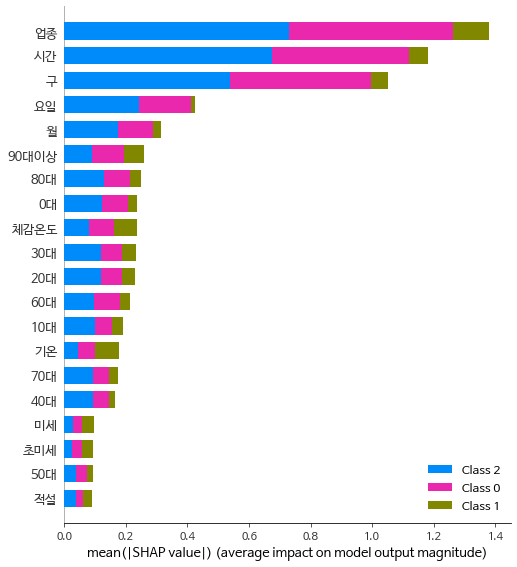

In [51]:
#다중 분류라 해당 변수가 어떤 클래스에 영향을 미쳤는지 표시됨.
shap.summary_plot(shap_values, X_val_encoded.iloc[:500], plot_type = 'bar')

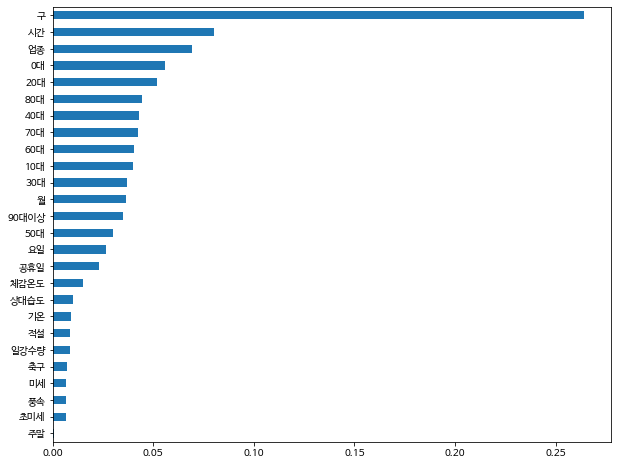

In [52]:
fig = plt.figure(figsize = (10,8))
pd.Series(xgb_best.feature_importances_, index = X_val.columns).sort_values().plot.barh()

In [75]:
#두 가지 중요도 그래프에서 모두 순위가 낮은 변수는 제거해보자.
# 주말, 초미세, 풍속, 미세,축구
print(df_final.shape)
df_final2 = df_final.drop(columns = ['주말', '초미세', '풍속', '미세', '축구'])
print(df_final2.shape)

X_train, X_test = train_test_split(df_final2, test_size = 0.2, random_state = 42)
X_train, X_val = train_test_split(X_train, test_size = 0.2, random_state = 42)
y_train, y_val, y_test = X_train.pop('주문정도'), X_val.pop('주문정도'), X_test.pop('주문정도')

encoder = TargetEncoder(min_samples_leaf = 2, smoothing = 1000)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)

(721437, 27)
(721437, 22)


In [147]:
#필요없는 변수를 좀 줄이고, n_estimators가 학습이 좀 덜 되게 함으로써 과적합을 줄인다.
xgb2 =  XGBClassifier(n_estimators = 120, random_state = 42, n_jobs = -1, tree_method = 'gpu_hist', predictor = 'gpu_predictor',
                     max_depth = 6, learning_rate = 0.25)
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]
xgb2.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'auc', early_stopping_rounds = 5)

[0]	validation_0-auc:0.75607	validation_1-auc:0.75518
[1]	validation_0-auc:0.76444	validation_1-auc:0.76325
[2]	validation_0-auc:0.77201	validation_1-auc:0.77060
[3]	validation_0-auc:0.77393	validation_1-auc:0.77258
[4]	validation_0-auc:0.77966	validation_1-auc:0.77802
[5]	validation_0-auc:0.78307	validation_1-auc:0.78121
[6]	validation_0-auc:0.78728	validation_1-auc:0.78524
[7]	validation_0-auc:0.78992	validation_1-auc:0.78777
[8]	validation_0-auc:0.79228	validation_1-auc:0.78991
[9]	validation_0-auc:0.79486	validation_1-auc:0.79242
[10]	validation_0-auc:0.79773	validation_1-auc:0.79522
[11]	validation_0-auc:0.79967	validation_1-auc:0.79709
[12]	validation_0-auc:0.80232	validation_1-auc:0.79964
[13]	validation_0-auc:0.80516	validation_1-auc:0.80231
[14]	validation_0-auc:0.80715	validation_1-auc:0.80434
[15]	validation_0-auc:0.80857	validation_1-auc:0.80565
[16]	validation_0-auc:0.81209	validation_1-auc:0.80911
[17]	validation_0-auc:0.81337	validation_1-auc:0.81037
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [178]:
#차이가 0.01 보다 작을 때까지 수동으로 돌린 결과 다음과 같은 결과가 젤 좋았다.
accuracy_and_auc2(xgb2)

학습 정확도 0.7231931109614289
검증 정확도 0.7176817118600017
학습 AUC 0.870879215030407
검증 AUC 0.8610796318558216
학습과 검증 AUC 차이 0.009799583174585402


In [154]:
#LGBM
lgbm = LGBMClassifier(random_state = 42, n_jobs = -1, objective = 'multiclass', num_class = 3)
dists = {
    'lightgbmclassifier__max_depth': np.arange(5,8,1),
    'lightgbmclassifier__learning_rate' : np.arange(0.1, 0.35, 0.01),
    'lightgbmclassifier__max_features': uniform(0,1),
    'lightgbmclassifier__n_estimators': np.arange(150,1000,50)
}

clf_lgbm = RandomizedSearchCV(
    lgbm,
    param_distributions = dists,
    n_iter = 100,
    cv = 5,
    scoring = 'roc_auc_ovr_weighted',
    verbose = 1,
    n_jobs = -1
)
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]
clf_lgbm.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'multi_logloss', early_stopping_rounds = 5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 15.7min finished


[1]	training's multi_logloss: 0.994874	valid_1's multi_logloss: 0.994151
[2]	training's multi_logloss: 0.970363	valid_1's multi_logloss: 0.969763
[3]	training's multi_logloss: 0.950152	valid_1's multi_logloss: 0.949696
[4]	training's multi_logloss: 0.932757	valid_1's multi_logloss: 0.932431
[5]	training's multi_logloss: 0.918406	valid_1's multi_logloss: 0.918266
[6]	training's multi_logloss: 0.906252	valid_1's multi_logloss: 0.906249
[7]	training's multi_logloss: 0.895472	valid_1's multi_logloss: 0.895636
[8]	training's multi_logloss: 0.886364	valid_1's multi_logloss: 0.886628
[9]	training's multi_logloss: 0.877054	valid_1's multi_logloss: 0.877498
[10]	training's multi_logloss: 0.869231	valid_1's multi_logloss: 0.869767
[11]	training's multi_logloss: 0.862207	valid_1's multi_logloss: 0.862854
[12]	training's multi_logloss: 0.856241	valid_1's multi_logloss: 0.85708
[13]	training's multi_logloss: 0.850767	valid_1's multi_logloss: 0.851717
[14]	training's multi_logloss: 0.846034	valid_1'

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(num_class=3, objective='multiclass',
                                            random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'lightgbmclassifier__learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34]),
                                        'lightgbmclassifier__max_depth': array([5, 6, 7]),
                                        'lightgbmclassifier__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f598020bb80>,
                                        'lightgbmclassifier__n_estimators': array([150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750,
       800, 850, 900, 950])},
                   scoring='roc_auc_ovr_weighted', verbose=1)

In [155]:
#Randomized search CV가 수동으로 만질 때보다 성능이 더 떨어짐.
print("Best Parameter: {}".format(clf_lgbm.best_params_))
lgbm_best = clf_lgbm.best_estimator_
lgbm_best.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'multi_logloss', early_stopping_rounds = 10)

Best Parameter: {'lightgbmclassifier__learning_rate': 0.21999999999999995, 'lightgbmclassifier__max_depth': 6, 'lightgbmclassifier__max_features': 0.668879150010527, 'lightgbmclassifier__n_estimators': 200}
[1]	training's multi_logloss: 0.994874	valid_1's multi_logloss: 0.994151
[2]	training's multi_logloss: 0.970363	valid_1's multi_logloss: 0.969763
[3]	training's multi_logloss: 0.950152	valid_1's multi_logloss: 0.949696
[4]	training's multi_logloss: 0.932757	valid_1's multi_logloss: 0.932431
[5]	training's multi_logloss: 0.918406	valid_1's multi_logloss: 0.918266
[6]	training's multi_logloss: 0.906252	valid_1's multi_logloss: 0.906249
[7]	training's multi_logloss: 0.895472	valid_1's multi_logloss: 0.895636
[8]	training's multi_logloss: 0.886364	valid_1's multi_logloss: 0.886628
[9]	training's multi_logloss: 0.877054	valid_1's multi_logloss: 0.877498
[10]	training's multi_logloss: 0.869231	valid_1's multi_logloss: 0.869767
[11]	training's multi_logloss: 0.862207	valid_1's multi_loglos

In [176]:
accuracy_and_auc2(lgbm_best)

학습 정확도 0.7066267578332276
검증 정확도 0.7053365676167375
학습 AUC 0.8492295579389644
검증 AUC 0.8453918186700103
학습과 검증 AUC 차이 0.0038377392689540324


In [185]:
#xgboost 보다 성능이 더 좋다.
lgbm2 =  LGBMClassifier(n_estimators = 200, random_state = 42, n_jobs = -1,learning_rate = 0.17)
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]
lgbm2.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'multi_logloss', early_stopping_rounds = 5)

[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: predictor
[1]	training's multi_logloss: 0.975805	valid_1's multi_logloss: 0.975177
[2]	training's multi_logloss: 0.940252	valid_1's multi_logloss: 0.939917
[3]	training's multi_logloss: 0.913981	valid_1's multi_logloss: 0.913951
[4]	training's multi_logloss: 0.894462	valid_1's multi_logloss: 0.894553
[5]	training's multi_logloss: 0.878982	valid_1's multi_logloss: 0.879328
[6]	training's multi_logloss: 0.866225	valid_1's multi_logloss: 0.866745
[7]	training's multi_logloss: 0.85547	valid_1's multi_logloss: 0.856289
[8]	training's multi_logloss: 0.846431	valid_1's multi_logloss: 0.84729
[9]	training's multi_logloss: 0.838021	valid_1's multi_logloss: 0.839045
[10]	training's multi_logloss: 0.832162	valid_1's multi_logloss: 0.833248
[11]	training's multi_logloss: 0.826468	valid_1's multi_logloss: 0.827643
[12]	training's multi_logloss: 0.820719	valid_1's multi_logloss: 0.821969
[13]	training's multi

[116]	training's multi_logloss: 0.671293	valid_1's multi_logloss: 0.681007
[117]	training's multi_logloss: 0.670947	valid_1's multi_logloss: 0.680727
[118]	training's multi_logloss: 0.670747	valid_1's multi_logloss: 0.680614
[119]	training's multi_logloss: 0.670324	valid_1's multi_logloss: 0.680256
[120]	training's multi_logloss: 0.669709	valid_1's multi_logloss: 0.679714
[121]	training's multi_logloss: 0.669438	valid_1's multi_logloss: 0.679543
[122]	training's multi_logloss: 0.669056	valid_1's multi_logloss: 0.679213
[123]	training's multi_logloss: 0.668575	valid_1's multi_logloss: 0.678793
[124]	training's multi_logloss: 0.668206	valid_1's multi_logloss: 0.678458
[125]	training's multi_logloss: 0.66796	valid_1's multi_logloss: 0.678333
[126]	training's multi_logloss: 0.667729	valid_1's multi_logloss: 0.678196
[127]	training's multi_logloss: 0.667397	valid_1's multi_logloss: 0.677927
[128]	training's multi_logloss: 0.666937	valid_1's multi_logloss: 0.677526
[129]	training's multi_log

LGBMClassifier(learning_rate=0.17, n_estimators=200, predictor='gpu_predictor',
               random_state=42, tree_method='gpu_hist')

In [186]:
#검증 데이터 성능이 xgboost보다 0.006 올랐다.
accuracy_and_auc2(lgbm2)

학습 정확도 0.7281744957430818
검증 정확도 0.72333015680499
학습 AUC 0.8776722474660733
검증 AUC 0.8678820906482795
학습과 검증 AUC 차이 0.009790156817793827


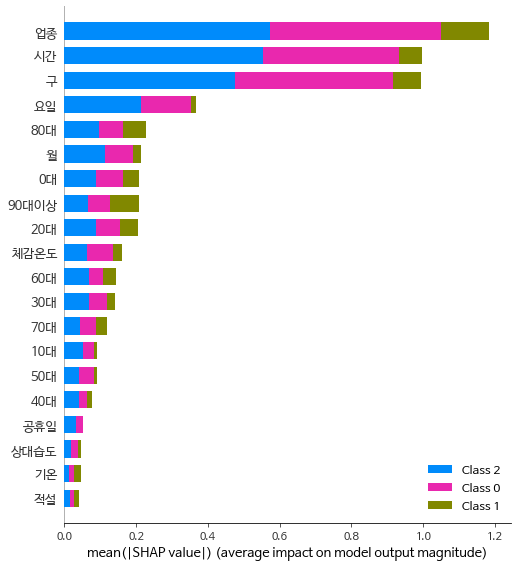

In [187]:
explainer = shap.TreeExplainer(lgbm2)
shap_values = explainer.shap_values(X_val_encoded.iloc[:500])

shap.initjs()
shap.summary_plot(shap_values, X_val_encoded.iloc[:500], plot_type = 'bar')

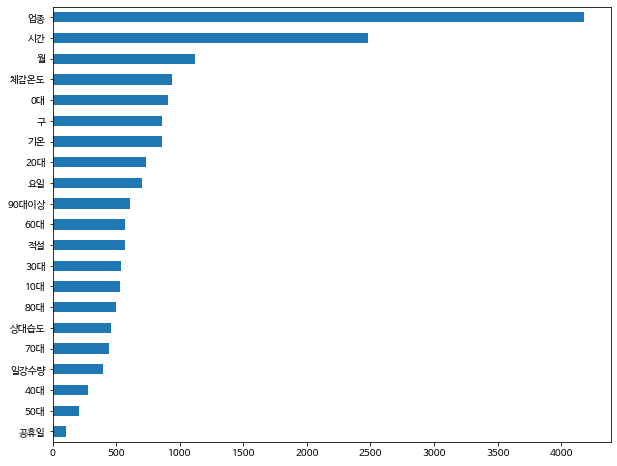

In [188]:
fig = plt.figure(figsize = (10,8))
pd.Series(lgbm2.feature_importances_, index = X_val.columns).sort_values().plot.barh()

### 여러가지 조합 결과 날씨관련변수를 모두 제거하고, 나이대도 0대와 90대이상을 제거하는게 XGBoost에서는 성능이 가장 높았다.

In [9]:
df_final2 = df_final.drop(columns = ['적설','일강수량', '상대습도', '체감온도', '90대이상', '0대', '50대', '주말', '미세',
                                    '초미세', '축구', '풍속'])
print(df_final2.shape)
df_final2.drop_duplicates(inplace = True) # 중복 때문에 기온을 넣었음.
print(df_final2.shape)
display(df_final2.head())

X_train, X_test = train_test_split(df_final2, test_size = 0.2, random_state = 42)
X_train, X_val = train_test_split(X_train, test_size = 0.2, random_state = 42)
y_train, y_val, y_test = X_train.pop('주문정도'), X_val.pop('주문정도'), X_test.pop('주문정도')

#encoder = TargetEncoder(min_samples_leaf = 2, smoothing = 1000)
#encoder = OrdinalEncoder()
encoder = OneHotEncoder(use_cat_names = True)

X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)

(721437, 15)
(716742, 15)


시간  업종   구  월    기온  공휴일 요일   10대    20대    30대    40대    60대   70대   80대  \
0  14  치킨  중구  5  21.0  0.0  일  7507  22325  21749  18632  16464  9514  3846   
1  23  치킨  중구  5  15.3  0.0  월  7507  22325  21749  18632  16464  9514  3846   
2  12  치킨  중구  5  23.9  0.0  목  7507  22325  21749  18632  16464  9514  3846   
3  22  치킨  중구  6  17.5  0.0  토  7507  22325  21749  18632  16464  9514  3846   
4  19  치킨  중구  6  24.9  0.0  수  7507  22325  21749  18632  16464  9514  3846   

   주문정도  
0     1  
1     1  
2     1  
3     1  
4     1

In [382]:
xgb3 =  XGBClassifier(n_estimators = 120, random_state = 42, n_jobs = -1, tree_method = 'gpu_hist', predictor = 'gpu_predictor',
                     max_depth = 6, learning_rate = 0.4)
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]
xgb3.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'auc', early_stopping_rounds = 5)

[0]	validation_0-auc:0.72166	validation_1-auc:0.72201
[1]	validation_0-auc:0.74224	validation_1-auc:0.74341
[2]	validation_0-auc:0.75840	validation_1-auc:0.75884
[3]	validation_0-auc:0.76781	validation_1-auc:0.76764
[4]	validation_0-auc:0.77859	validation_1-auc:0.77826
[5]	validation_0-auc:0.78660	validation_1-auc:0.78613
[6]	validation_0-auc:0.79361	validation_1-auc:0.79291
[7]	validation_0-auc:0.79682	validation_1-auc:0.79606
[8]	validation_0-auc:0.80727	validation_1-auc:0.80664
[9]	validation_0-auc:0.80950	validation_1-auc:0.80865
[10]	validation_0-auc:0.81511	validation_1-auc:0.81448
[11]	validation_0-auc:0.81815	validation_1-auc:0.81729
[12]	validation_0-auc:0.82008	validation_1-auc:0.81910
[13]	validation_0-auc:0.82346	validation_1-auc:0.82241
[14]	validation_0-auc:0.82575	validation_1-auc:0.82451
[15]	validation_0-auc:0.82661	validation_1-auc:0.82529
[16]	validation_0-auc:0.83035	validation_1-auc:0.82904
[17]	validation_0-auc:0.83271	validation_1-auc:0.83134
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=120, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [383]:
accuracy_and_auc2(xgb3) #날씨 뺴니까 성능 향상
#OHE 쓸 때 성능이 젤 좋음.

학습 정확도 0.7307472630004752
검증 정확도 0.726427680743641
학습 AUC 0.8807682738888801
검증 AUC 0.8708068662100683
학습과 검증 AUC 차이 0.009961407678811818


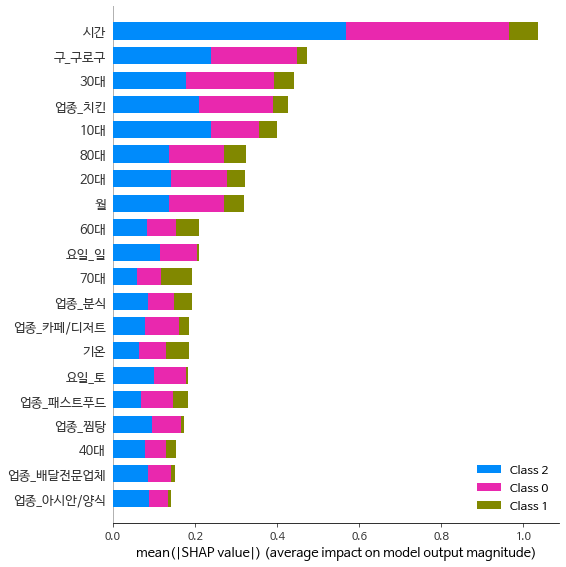

In [384]:
explainer = shap.TreeExplainer(xgb3)
shap_values = explainer.shap_values(X_val_encoded.iloc[:500])

shap.initjs()
shap.summary_plot(shap_values, X_val_encoded.iloc[:500], plot_type = 'bar')

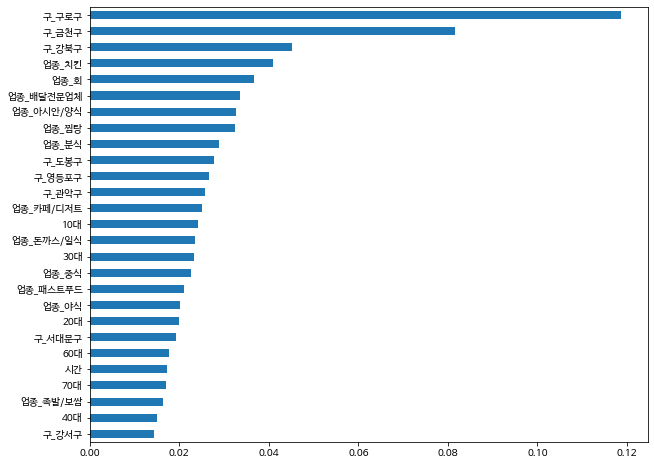

In [385]:
fig = plt.figure(figsize = (10,8))
pd.Series(xgb3.feature_importances_, index = X_val_encoded.columns).sort_values().iloc[30:].plot.barh()

In [386]:
X_test_encoded = encoder.transform(X_test)
y_prob = xgb3.predict_proba(X_test_encoded)
test_roc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print('테스트 정확도', xgb3.score(X_test_encoded, y_test))
print('테스트 AUC', roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted"))

테스트 정확도 0.7245812666987562
테스트 AUC 0.8703433178202166


### LGBM 변수조합 찾기
### 여러가지 실험 결과 최종모델 LGBM.
['업종', '시간', '월', '요일', '구', '50대를 제외한 나이대 모두, '공휴일'] 을 변수로 사용하는게 가장 좋았다.

열심히 추가했던 날씨, 미세먼지, 축구 변수는 아쉽지만 성능을 올리는데 크게 영향을 못 미쳤다.

In [11]:
#날씨관련해서 모두 제거하고 돌려보자.
#df_final2 = df_final.drop(columns = ['축구', '풍속','상대습도', '초미세', '미세', '일강수량', '적설', '체감온도'])
df_final2 = df_final.drop(columns = ['풍속','상대습도', '초미세', '미세', '일강수량', '적설', '체감온도'])
print(df_final2.shape)
df_final2.drop_duplicates(inplace = True)
print(df_final2.shape)
display(df_final2.head())
X_train, X_test = train_test_split(df_final2, test_size = 0.2, random_state = 42)
X_train, X_val = train_test_split(X_train, test_size = 0.2, random_state = 42)
y_train, y_val, y_test = X_train.pop('주문정도'), X_val.pop('주문정도'), X_test.pop('주문정도')

#encoder = TargetEncoder(min_samples_leaf = 2, smoothing = 1000)
#encoder = OrdinalEncoder()
encoder = OneHotEncoder(use_cat_names = True)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_val_encoded = encoder.transform(X_val)

(721437, 20)
(716742, 20)


시간  업종   구  월    기온  공휴일 요일   주말   축구    0대   10대    20대    30대    40대  \
0  14  치킨  중구  5  21.0  0.0  일  1.0  0.0  7534  7507  22325  21749  18632   
1  23  치킨  중구  5  15.3  0.0  월  0.0  0.0  7534  7507  22325  21749  18632   
2  12  치킨  중구  5  23.9  0.0  목  0.0  0.0  7534  7507  22325  21749  18632   
3  22  치킨  중구  6  17.5  0.0  토  1.0  0.0  7534  7507  22325  21749  18632   
4  19  치킨  중구  6  24.9  0.0  수  0.0  0.0  7534  7507  22325  21749  18632   

     50대    60대   70대   80대  90대이상  주문정도  
0  20811  16464  9514  3846    541     1  
1  20811  16464  9514  3846    541     1  
2  20811  16464  9514  3846    541     1  
3  20811  16464  9514  3846    541     1  
4  20811  16464  9514  3846    541     1

In [444]:
lgbm3 =  LGBMClassifier(n_estimators = 330, random_state = 42, n_jobs = -1,max_depth = 5,learning_rate = 0.22)
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]
lgbm3.fit(X_train_encoded, y_train, eval_set = eval_set, eval_metric = 'multi_logloss', early_stopping_rounds = 5)

[1]	training's multi_logloss: 0.98094	valid_1's multi_logloss: 0.9807
[2]	training's multi_logloss: 0.953342	valid_1's multi_logloss: 0.953063
[3]	training's multi_logloss: 0.929735	valid_1's multi_logloss: 0.929406
[4]	training's multi_logloss: 0.912925	valid_1's multi_logloss: 0.91246
[5]	training's multi_logloss: 0.900138	valid_1's multi_logloss: 0.899719
[6]	training's multi_logloss: 0.888812	valid_1's multi_logloss: 0.888397
[7]	training's multi_logloss: 0.878307	valid_1's multi_logloss: 0.87806
[8]	training's multi_logloss: 0.868942	valid_1's multi_logloss: 0.868613
[9]	training's multi_logloss: 0.861278	valid_1's multi_logloss: 0.861099
[10]	training's multi_logloss: 0.854248	valid_1's multi_logloss: 0.854147
[11]	training's multi_logloss: 0.847566	valid_1's multi_logloss: 0.847454
[12]	training's multi_logloss: 0.842054	valid_1's multi_logloss: 0.842008
[13]	training's multi_logloss: 0.838177	valid_1's multi_logloss: 0.838193
[14]	training's multi_logloss: 0.831542	valid_1's mu

[118]	training's multi_logloss: 0.682443	valid_1's multi_logloss: 0.687279
[119]	training's multi_logloss: 0.681747	valid_1's multi_logloss: 0.686641
[120]	training's multi_logloss: 0.68127	valid_1's multi_logloss: 0.68625
[121]	training's multi_logloss: 0.680871	valid_1's multi_logloss: 0.685922
[122]	training's multi_logloss: 0.680492	valid_1's multi_logloss: 0.68563
[123]	training's multi_logloss: 0.680037	valid_1's multi_logloss: 0.685227
[124]	training's multi_logloss: 0.679527	valid_1's multi_logloss: 0.684746
[125]	training's multi_logloss: 0.678537	valid_1's multi_logloss: 0.683748
[126]	training's multi_logloss: 0.677834	valid_1's multi_logloss: 0.683025
[127]	training's multi_logloss: 0.677482	valid_1's multi_logloss: 0.682762
[128]	training's multi_logloss: 0.676791	valid_1's multi_logloss: 0.682102
[129]	training's multi_logloss: 0.676414	valid_1's multi_logloss: 0.681802
[130]	training's multi_logloss: 0.67593	valid_1's multi_logloss: 0.681408
[131]	training's multi_loglos

[233]	training's multi_logloss: 0.642788	valid_1's multi_logloss: 0.653731
[234]	training's multi_logloss: 0.642711	valid_1's multi_logloss: 0.653692
[235]	training's multi_logloss: 0.642536	valid_1's multi_logloss: 0.653555
[236]	training's multi_logloss: 0.64223	valid_1's multi_logloss: 0.653327
[237]	training's multi_logloss: 0.641912	valid_1's multi_logloss: 0.653049
[238]	training's multi_logloss: 0.641605	valid_1's multi_logloss: 0.652799
[239]	training's multi_logloss: 0.641119	valid_1's multi_logloss: 0.652351
[240]	training's multi_logloss: 0.641006	valid_1's multi_logloss: 0.652318
[241]	training's multi_logloss: 0.640845	valid_1's multi_logloss: 0.652252
[242]	training's multi_logloss: 0.640687	valid_1's multi_logloss: 0.652151
[243]	training's multi_logloss: 0.640502	valid_1's multi_logloss: 0.65203
[244]	training's multi_logloss: 0.6403	valid_1's multi_logloss: 0.651897
[245]	training's multi_logloss: 0.639999	valid_1's multi_logloss: 0.651675
[246]	training's multi_loglos

LGBMClassifier(learning_rate=0.22, max_depth=5, n_estimators=330,
               random_state=42)

In [445]:
#xgboost보다 성능이 좋다. OHE가 성능이 더 좋다.
accuracy_and_auc2(lgbm3)

학습 정확도 0.732990490806908
검증 정확도 0.7271776000837119
학습 AUC 0.8826146427814654
검증 AUC 0.872723329974138
학습과 검증 AUC 차이 0.009891312807327357


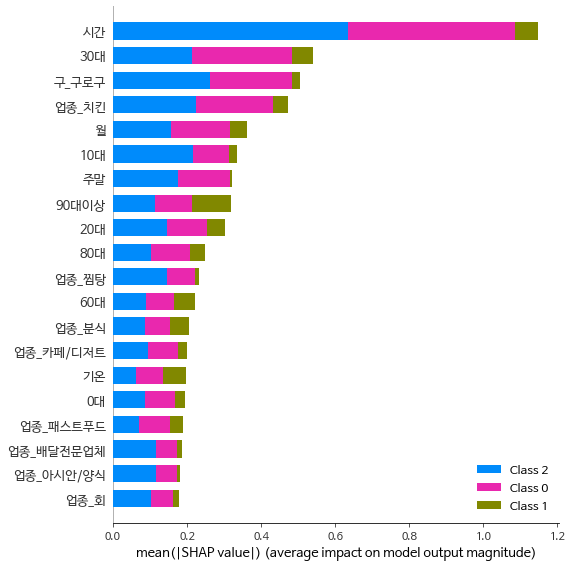

In [446]:
explainer = shap.TreeExplainer(lgbm3)
shap_values = explainer.shap_values(X_val_encoded.iloc[:500])

shap.initjs()
shap.summary_plot(shap_values, X_val_encoded.iloc[:500], plot_type = 'bar')

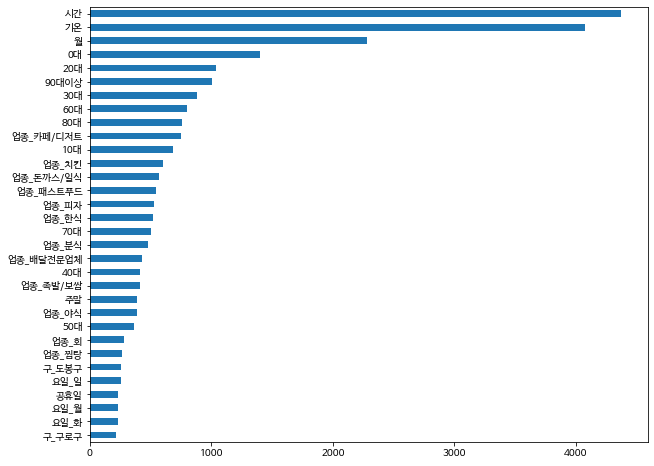

In [447]:
fig = plt.figure(figsize = (10,8))
pd.Series(lgbm3.feature_importances_, index = X_val_encoded.columns).sort_values().iloc[30:].plot.barh()

In [448]:
X_test_encoded = encoder.transform(X_test)
y_prob = lgbm3.predict_proba(X_test_encoded)
test_roc = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

print('테스트 정확도', lgbm3.score(X_test_encoded,y_test))
print('테스트 AUC', roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted"))

테스트 정확도 0.7262066704336968
테스트 AUC 0.8723435259019805


### 최종적으로 테스트 score가 0.872다.
### OHE를 써서 원래 중요했던 '구'변수의 의미가 분산되었기 때문에 중요하지 않은 변수로 취급되었다.
### 하지만 OHE를 썼을 때 성능이 가장 좋았다.

### 가상의 상황 테스트

In [449]:
df_final2.head()

시간  업종   구  월    기온  공휴일 요일   주말   축구    0대   10대    20대    30대    40대  \
0  14  치킨  중구  5  21.0  0.0  일  1.0  0.0  7534  7507  22325  21749  18632   
1  23  치킨  중구  5  15.3  0.0  월  0.0  0.0  7534  7507  22325  21749  18632   
2  12  치킨  중구  5  23.9  0.0  목  0.0  0.0  7534  7507  22325  21749  18632   
3  22  치킨  중구  6  17.5  0.0  토  1.0  0.0  7534  7507  22325  21749  18632   
4  19  치킨  중구  6  24.9  0.0  수  0.0  0.0  7534  7507  22325  21749  18632   

     50대    60대   70대   80대  90대이상  주문정도  
0  20811  16464  9514  3846    541     1  
1  20811  16464  9514  3846    541     1  
2  20811  16464  9514  3846    541     1  
3  20811  16464  9514  3846    541     1  
4  20811  16464  9514  3846    541     1

In [586]:
df_test = pd.DataFrame([df_final2.loc[df_final2['구'] == '구로구'].iloc[0]])
test_list = [20,'치킨', '구로구', 3,20 ,0, '금', 0, 1]
for i in range(len(test_list)):
    df_test.iloc[:,i] = test_list[i]
df_test.drop(columns = ['주문정도'], inplace = True)
df_test.head() # 인구수는 그대로 하고 나머지 변수만 바꿔서 주문 정도를 예측해보자.

시간  업종    구  월    기온  공휴일 요일   주말   축구     0대    10대    20대    30대  \
55333  20  치킨  구로구  3  20.0  0.0  금  0.0  1.0  31456  31404  55916  70334   

         40대    50대    60대    70대    80대  90대이상  
55333  68362  72672  59195  30190  10270   1202

In [587]:
df_final2.duplicated().sum()

0

In [589]:
test_encoded = encoder.transform(df_test)
result = lgbm3.predict(test_encoded)
print(result[0])
if result[0] == 1:
    print('주문량이 적을 것입니다.')
elif result[0] == 2:
    print('주문량이 보통일 것입니다.')
else:
    print('주문량이 많을 것입니다.')


3
주문량이 많을 것입니다.


In [590]:
df_final2.loc[(df_final2['시간'] == 20) & (df_final2['업종'] == '치킨') & (df_final2['구'] == '구로구') & 
              (df_final2['기온'] >= 15) & (df_final2['기온'] < 20) &(df_final2['요일'] == '금') &(df_final2['축구'] == 1)]

시간  업종    구   월    기온  공휴일 요일   주말   축구     0대    10대    20대    30대  \
251722  20  치킨  구로구  10  17.7  1.0  금  0.0  1.0  29637  29898  55435  67782   

          40대    50대    60대    70대    80대  90대이상  주문정도  
251722  66894  71362  61764  32081  11138   1316     3

In [591]:
df_test = pd.DataFrame([df_final2.loc[df_final2['구'] == '성북구'].iloc[0]])
test_list = [20,'치킨', '성북구', 9,24 ,0, '금', 0, 1]
for i in range(len(test_list)):
    df_test.iloc[:,i] = test_list[i]
df_test.drop(columns = ['주문정도'], inplace = True)
df_test.head() # 인구수는 그대로 하고 나머지 변수만 바꿔서 주문 정도를 예측해보자.

시간  업종    구  월    기온  공휴일 요일   주말   축구     0대    10대    20대    30대  \
26850  20  치킨  성북구  9  24.0  0.0  금  0.0  1.0  30256  37906  79844  61589   

         40대    50대    60대    70대    80대  90대이상  
26850  69876  66865  50190  31759  12237   1531

In [592]:
test_encoded = encoder.transform(df_test)
result = lgbm3.predict(test_encoded)
print(result[0])
if result[0] == 1:
    print('주문량이 적을 것입니다.')
elif result[0] == 2:
    print('주문량이 보통일 것입니다.')
else:
    print('주문량이 많을 것입니다.')


2
주문량이 보통일 것입니다.


In [593]:
df_final2.loc[(df_final2['시간'] == 20) & (df_final2['업종'] == '치킨') & (df_final2['구'] == '성북구') & 
              (df_final2['기온'] >= 20) & (df_final2['기온'] < 23) &(df_final2['요일'] == '금') &(df_final2['축구'] == 1)]

시간  업종    구   월    기온  공휴일 요일   주말   축구     0대    10대    20대    30대  \
28351  20  치킨  성북구  10  20.4  0.0  금  0.0  1.0  30256  37906  79844  61589   

         40대    50대    60대    70대    80대  90대이상  주문정도  
28351  69876  66865  50190  31759  12237   1531     2

In [594]:
df_test = pd.DataFrame([df_final2.loc[df_final2['구'] == '성북구'].iloc[0]])
test_list = [20,'치킨', '성북구', 3,15 ,0, '목', 0, 0]
for i in range(len(test_list)):
    df_test.iloc[:,i] = test_list[i]
df_test.drop(columns = ['주문정도'], inplace = True)
df_test.head() # 인구수는 그대로 하고 나머지 변수만 바꿔서 주문 정도를 예측해보자.

시간  업종    구  월    기온  공휴일 요일   주말   축구     0대    10대    20대    30대  \
26850  20  치킨  성북구  3  15.0  0.0  목  0.0  0.0  30256  37906  79844  61589   

         40대    50대    60대    70대    80대  90대이상  
26850  69876  66865  50190  31759  12237   1531

In [595]:
test_encoded = encoder.transform(df_test)
result = lgbm3.predict(test_encoded)
print(result[0])
if result[0] == 1:
    print('주문량이 적을 것입니다.')
elif result[0] == 2:
    print('주문량이 보통일 것입니다.')
else:
    print('주문량이 많을 것입니다.')


1
주문량이 적을 것입니다.


In [596]:
df_final2.loc[(df_final2['시간'] == 20) & (df_final2['업종'] == '치킨') & (df_final2['구'] == '성북구') & 
              (df_final2['기온'] >= 20) & (df_final2['기온'] < 23) &(df_final2['요일'] == '목') &(df_final2['축구'] == 0)]

시간  업종    구   월    기온  공휴일 요일   주말   축구     0대    10대    20대    30대  \
28012  20  치킨  성북구  10  22.4  1.0  목  0.0  0.0  30256  37906  79844  61589   

         40대    50대    60대    70대    80대  90대이상  주문정도  
28012  69876  66865  50190  31759  12237   1531     1

### 최종 지도 시각화

In [24]:
import json
import folium
map_data = json.load(open(f'{DATA_PATH}Seoul_Gu.json', encoding = 'cp949'))

In [46]:
population = pd.read_csv(f'{DATA_PATH}population.csv')
population.head()

기간 행정구역별  성별          계     0~4세     5~9세   10~14세   15~19세   20~24세  \
0  2019    합계   계  9,662,041  309,701  348,151  355,751  442,841  682,985   
1  2019    합계  남자  4,698,629  158,665  178,816  183,403  226,589  321,742   
2  2019    합계  여자  4,963,412  151,036  169,335  172,348  216,252  361,243   
3  2019   종로구   계    154,458    3,588    4,402    4,850    7,766   14,775   
4  2019   종로구  남자     74,886    1,793    2,244    2,501    4,207    6,561   

    25~29세  ...   50~54세   55~59세   60~64세   65~69세   70~74세   75~79세  \
0  825,843  ...  767,181  774,158  692,351  476,772  370,383  283,560   
1  403,906  ...  374,998  372,714  328,454  224,384  170,499  127,618   
2  421,937  ...  392,183  401,444  363,897  252,388  199,884  155,942   
3   14,764  ...   12,324   12,519   10,808    7,301    6,107    5,418   
4    7,436  ...    5,944    6,159    5,370    3,482    2,703    2,371   

    80~84세  85~89세  90~94세 95세 이상+   
0  166,370  72,512  25,568    6,587  
1   66,389  23,101   6,312    1,515  
2   99,981  49,411  19,256    5,072  
3    3,353   1,544     553      158  
4    1,343     536     165       42  

[5 rows x 24 columns]

In [47]:
def to_int(s):
    return int(s.replace(',',''))

In [48]:
# , 제거
col = population.columns[3:].tolist()
for i in col:
    population[i] = population[i].apply(to_int)

In [49]:
#10대, 20대처럼 10살 단위로 묶기
col = population.columns[4:].tolist()
age = 0
for i in range(0,len(col),2):
    globals()['population_{}'.format(age*10)] = population.iloc[:,i+4] + population.iloc[:,i+5] # 글로벌 변수로 한 번에 할당.
    age = age + 1

In [50]:
population['0대'] = population_0
population['10대'] = population_10
population['20대'] = population_20
population['30대'] = population_30
population['40대'] = population_40
population['50대'] = population_50
population['60대'] = population_60
population['70대'] = population_70
population['80대'] = population_80
population['90대이상'] = population_90

In [51]:
#성별이랑 불필요한 나이대 제거
population = population.loc[(population['성별'] == '계') & (population['행정구역별'] != '합계')]
population.drop(columns = population.columns[2:24].tolist(),inplace =True)
population.head()

기간 행정구역별     0대    10대    20대    30대    40대    50대    60대    70대   80대  \
3   2019   종로구   7990  12616  29539  21596  22632  24843  18109  11525  4897   
6   2019    중구   7534   7507  22325  21749  18632  20811  16464   9514  3846   
9   2019   용산구  14502  15798  34101  39772  36193  35090  25596  15570  6844   
12  2019   성동구  21784  21022  51136  52128  46729  48152  34574  19625  7368   
15  2019   광진구  22040  26935  69289  60924  54683  57404  40517  21242  7663   

    90대이상  
3     711  
6     541  
9     953  
12    922  
15   1014

In [52]:
population = population.loc[population['기간'] == 2021]
population['총인구수'] = population.iloc[:,2:].sum(axis = 1)
population.head()

기간 행정구역별     0대    10대    20대    30대    40대    50대    60대    70대   80대  \
159  2021   종로구   7119  10303  28111  20817  21152  24454  19852  11403  5524   
162  2021    중구   6598   6393  21004  20848  17852  20057  17839   9815  4347   
165  2021   용산구  12828  14513  33182  38027  34788  35269  27975  15569  7572   
168  2021   성동구  20677  19876  53606  54589  47399  49839  39471  20730  8681   
171  2021   광진구  19545  24682  66512  58645  52094  55594  45107  22208  8909   

     90대이상    총인구수  
159    818  149553  
162    645  125398  
165   1108  220831  
168   1075  315943  
171   1151  354447

In [69]:
population

기간 행정구역별     0대    10대     20대     30대     40대     50대    60대    70대  \
159  2021   종로구   7119  10303   28111   20817   21152   24454  19852  11403   
162  2021    중구   6598   6393   21004   20848   17852   20057  17839   9815   
165  2021   용산구  12828  14513   33182   38027   34788   35269  27975  15569   
168  2021   성동구  20677  19876   53606   54589   47399   49839  39471  20730   
171  2021   광진구  19545  24682   66512   58645   52094   55594  45107  22208   
174  2021  동대문구  20194  22708   66375   53093   50272   53234  47608  27366   
177  2021   중랑구  21684  25214   53764   56036   55583   67066  59055  30630   
180  2021   성북구  26635  34883   77236   58684   66125   66851  54609  32064   
183  2021   강북구  14793  20689   42514   37596   44039   50626  46252  28995   
186  2021   도봉구  17784  24209   42888   39706   46638   55484  50507  27554   
189  2021   노원구  30605  50012   76046   61341   81870   85739  68962  36945   
192  2021   은평구  28235  36226   63359   66297   73260   74955  64678  37757   
195  2021  서대문구  18968  22366   60631   45041   45396   47930  38756  23374   
198  2021   마포구  23793  26555   63653   64558   58484   52503  39577  23045   
201  2021   양천구  28881  47410   54697   55117   74940   74417  57894  27966   
204  2021   강서구  39886  42947   83689  100881   90767   86280  79863  39013   
207  2021   구로구  27526  28974   54900   65795   65140   70653  64582  33155   
210  2021   금천구  13347  14290   36221   38898   35418   45015  38520  18703   
213  2021  영등포구  23639  22148   55697   69796   56881   63009  54106  27035   
216  2021   동작구  23790  26532   72505   64378   57849   60030  52065  29500   
219  2021   관악구  22538  27048  113253   90908   67481   70006  62736  36618   
222  2021   서초구  30320  40863   52583   61187   71946   61313  47274  25975   
225  2021   강남구  32304  54323   68374   77021   91312   76775  58325  32220   
228  2021   송파구  48836  56535   92318  110159  107632  103946  87421  40188   
231  2021   강동구  25335  33114   51787   57541   62732   63666  58618  28508   

       80대  90대이상    총인구수  
159   5524    818  149553  
162   4347    645  125398  
165   7572   1108  220831  
168   8681   1075  315943  
171   8909   1151  354447  
174  11261   1287  353398  
177  11456   1362  381850  
180  14089   1767  432943  
183  11484   1311  298299  
186  12097   1637  318504  
189  16393   2173  510086  
192  15660   1888  462315  
195  11150   1422  315034  
198  10569   1329  364066  
201  10956   1571  433849  
204  14901   2200  580427  
207  12085   1439  424249  
210   6630    815  247857  
213  11178   1453  384942  
216  12016   1531  400196  
219  13030   1497  505115  
222   9688   1704  402853  
225  11794   2074  504522  
228  14197   2126  663358  
231  10162   1644  393107

In [58]:
map_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.012, 37.582],
      [127.015, 37.582],
      [127.016, 37.582],
      [127.017, 37.582],
      [127.017, 37.581],
      [127.017, 37.58],
      [127.018, 37.58],
      [127.018, 37.579],
      [127.018, 37.578],
      [127.019, 37.578],
      [127.02, 37.578],
      [127.019, 37.578],
      [127.02, 37.578],
      [127.02, 37.579],
      [127.021, 37.579],
      [127.022, 37.579],
      [127.023, 37.578],
      [127.023, 37.577],
      [127.023, 37.576],
      [127.023, 37.575],
      [127.023, 37.572],
      [127.018, 37.57],
      [127.015, 37.57],
      [127.001, 37.569],
      [126.997, 37.569],
      [126.99, 37.568],
      [126.976, 37.569],
      [126.969, 37.568],
      [126.967, 37.566],
      [126.954, 37.579],
      [126.957, 37.58],
      [126.958, 37.584],
      [126.958, 37.594],
      [126.958, 37.598],
      [126.953, 37.6],
      [126.954, 37.605

In [77]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=map_data,
              data = population,
              columns = ['행정구역별', '총인구수'],
              fill_color='YlOrRd',
              key_on='feature.properties.SIG_KOR_NM')
map

In [92]:
df_map_gu = df_final.groupby('구')['주문정도'].sum().to_frame().reset_index()
df_map_gu.head()

구    주문정도
0  강남구    6817
1  강동구      43
2  강북구   12269
3  강서구   18716
4  관악구  110934

In [93]:
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map2.choropleth(geo_data=map_data,
              data = df_map_gu,
              columns = ['구', '주문정도'],
              fill_color='YlOrRd',
              key_on='feature.properties.SIG_KOR_NM')
map2

In [96]:
df_soccer = df_final.loc[(df_final['축구'] == 1) & (df_final['업종'] == '치킨')]
df_no = df_final.loc[(df_final['축구'] == 0) & (df_final['업종'] == '치킨')]

print(df_soccer['주문정도'].value_counts(normalize = True))
print(df_no['주문정도'].value_counts(normalize = True))

3    0.615385
1    0.222222
2    0.162393
Name: 주문정도, dtype: float64
3    0.500574
1    0.329206
2    0.170219
Name: 주문정도, dtype: float64


3    0.615385
1    0.222222
2    0.162393
Name: 주문정도, dtype: float64


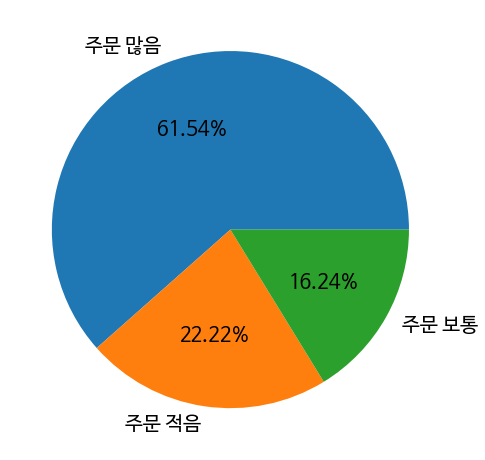

In [102]:
df_pie1 = df_soccer['주문정도'].value_counts(normalize = True)
print(df_pie1)
fig = plt.figure(figsize = (8,15))
plt.pie(df_pie1, labels = ['주문 많음', '주문 적음', '주문 보통'], autopct = '%.2f%%',textprops={'fontsize': 20})
plt.show()

3    0.500574
1    0.329206
2    0.170219
Name: 주문정도, dtype: float64


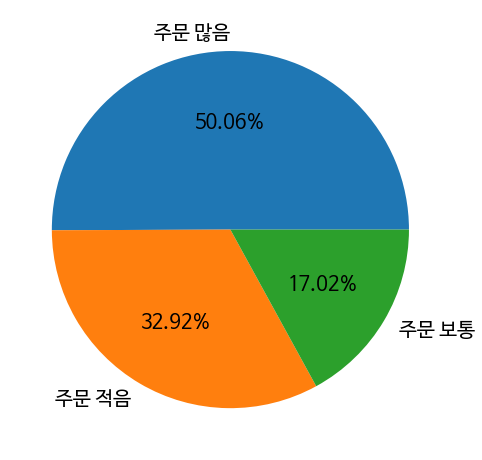

In [103]:
df_pie2 = df_no['주문정도'].value_counts(normalize = True)
print(df_pie2)
fig = plt.figure(figsize = (8,15))
plt.pie(df_pie2, labels = ['주문 많음', '주문 적음', '주문 보통'], autopct = '%.2f%%',textprops={'fontsize': 20})
plt.show()